<a href="https://colab.research.google.com/github/PercyAyimbilaNsolemna/Image-Processing/blob/main/Notebooks/readingImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMAGE READING AND CONVERSION**

Welcome to the image reading and conversion tutorial

This notebook seeks to achieve three important this

  - *Reading image(s) in google colab from your google drive*
  - *Checking the shape of an image*
  - *Transforming images from one image type to the other*

Let's get started

## **IMPORT PACKAGES**

**Numpy:** Numpy is a fundamental package for scientific computing with Python

**OpenCV:** OpenCV provides a real-time optimized Computer Vision library, tools, and hardware. The openCV library will be used for our image processing.

**Drive:** Drive is a module in google.colab which will be used to mount google drive to access all files in our google drive.

In [1]:
#Installs Pillow library if it is not already installed
!pip install Pillow

In [2]:
#Imports openCV
import cv2

#Imports numpy
import numpy as np

#Imports matplotlib
import matplotlib.pyplot as plt

#Imports Image from PIL
from PIL import Image

#Imports display from Ipython.display
from IPython.display import display

#Imports drive from google.colab
from google.colab import drive

## **MOUNTS GOOGLE DRIVE**

This section connects google drive to google colab so that all the files in the google drive can be read.

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


# **LOADS THE IMAGE**

The image is read from our google drive to the notebook using openCV's imread method

The imread method takes the file path to the image you want to read as an argument

**How To Access the Filepath easily in google colab**
- Click on the folder icon on the left pane of the colab window
- Navigate to the directory that has the file(image)
- Place the mouse on the file and click on the three dots at the extreme end of the file.
- Click on copy path to copy the filepath
- Paste the copied filepath in the imread method

In [4]:
catImage = cv2.imread('/content/drive/MyDrive/Image Processing/Images/cs50Cat.jpeg')

In [5]:
#Checks if the image has been loaded successfully
assert catImage is not None, "file could not be read, check with os.path.exists()"
print("\033[92mImage successfully loaded")

Image successfully loaded


## **IMAGE DIMENSION**

This explores checking the shape of the imported image. The shape is in the format (Height, Width, Channels).

The Channels is included only for color images

```
Note
If an image is grayscale, the tuple returned contains only the number of rows and columns,so it is a good method to check whether the loaded image is grayscale or color.


In [6]:
#Checks the shape of the image
print(f'The shape of the image is {catImage.shape}')

The shape of the image is (224, 225, 3)


The image has a height (row) of 224, 225 in width (column) and 3 for the BGR values

## **NUMBER OF PIXELS**

This cell show how to access the total number of pixels in an image

In [7]:
print(f'The total number of pixels in the image is {catImage.size}')

The total number of pixels in the image is 151200


This means that each BGR has a shape of (224, 225).

```
Total pixels = rows * columns * channels
Total pixels = 224 * 225 * 3
Total pixels = 151200


## **ACCESSING AND MODIFYING PIXEL VALUES**
Pixel value can be accessed by its row and column coordinates. For BGR image, it returns an array of Blue, Green, Red values. For grayscale image, just corresponding intensity is returned.

```
NOTE
OpenCV stores images in the form of Blue, Green, Red (BGR)
instead of Red, Blue, Green (RBG)


In [8]:
#Access the pixel value at row 100 and column 100 [100, 100], feel free to modify the row and column values make sure they are within 223, 224 range
row = 50
column = 50
print(f'The pixel value at row {row} and column {column} is {catImage[row, column]} \n')

#Indexing the Blue value in the specified row and column
print(f'The Blue value at pixel with row {row} and column {column} is {catImage[row, column][0]} \n')

#Indexing the Green value in the specified row and column
print(f'The Green value at pixel with row {row} and column {column} is {catImage[row, column][1]} \n')

#Indexing the Red value in the specified row and column
print(f'The Red value at the piuxel with row {row} and {column} is {catImage[row, column][2]}')

The pixel value at row 50 and column 50 is [153 165 183] 

The Blue value at pixel with row 50 and column 50 is 153 

The Green value at pixel with row 50 and column 50 is 165 

The Red value at the piuxel with row 50 and 50 is 183


In [9]:
#Copies the catImge to catImageModify
catImageModify = catImage

#Outputs the pixel value at the specified row and column
print(f'The pixel value at row {row} and column {column} is {catImageModify[row, column]} \n')

#Modify the pixel values at the specified row and column
catImageModify[row, column] = [255, 255, 255]

#Outputs the pixel value at the row and column which was modified
print(f'The modified pixel value at row {row} and column {column} is {catImageModify[row, column]}')

The pixel value at row 50 and column 50 is [153 165 183] 

The modified pixel value at row 50 and column 50 is [255 255 255]


## **IMAGE CONVERSION**

The remaining sessions converts the image to the various types of images
- Color (RGB current state of the image)
- Grayscale
- Binary

## **CONVERTS AND DISPLAYS THE COLORED IMAGE**

The cells below converts the image from **Blue Green Red (BGR) to Red Green Blue (RGB)** and  **displays the image using IPytrhon's image method**.


In [10]:
#Converts the image from BGR to RGB inorder to view the original image
catImageRGB = cv2.cvtColor(catImage, cv2.COLOR_BGR2RGB)

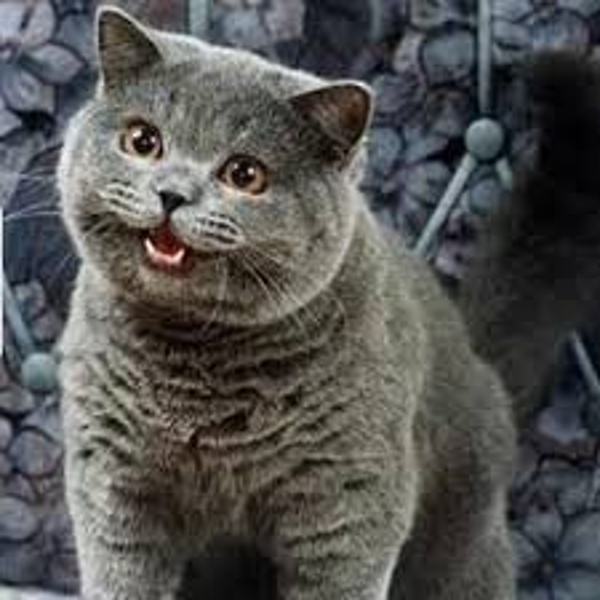

In [11]:
#Uses fromarray method in the Image module in Pillow to transform the numpy array to an image
catImageRGBPil = Image.fromarray(catImageRGB)
#Resizes the cat image
catImageRGBPil = catImageRGBPil.resize((600, 600))
#Displays the image using display method from Ipython.display
display(catImageRGBPil)

## **CONVERTS AND DISPLAYS THE COLORED IMAGE IN GRAYSCALE**

These cells will handle converting the colored image which is in RGB  to grayscale and display it.

In [12]:
#Converts the image from RGB to Grayscale
catImageGrayscale = cv2.cvtColor(catImageRGB, cv2.COLOR_RGB2GRAY)

In [13]:
#Checks the shape of the Grayscale image
print(f'The shape of the grayscale image is {catImageGrayscale.shape}')

The shape of the grayscale image is (224, 225)


It can be seen that now the shape of the image is Height (row) * Width (column) excluding the channels which holds the RGB value

In [14]:
#Outputs the pixel value at the already specified row and column
print(f'The pixel value at row {row} and column {column} is {catImageGrayscale[row, column]}')

The pixel value at row 50 and column 50 is 255


The output is a digit which range from 0 to 255 determining the color intensity at that particular region.

0 --  Black

255 -- White

In [15]:
#Outputs the size of the cat image in grayscale
print(f'The size of the image in grayscale is {catImageGrayscale.size}')

The size of the image in grayscale is 50400


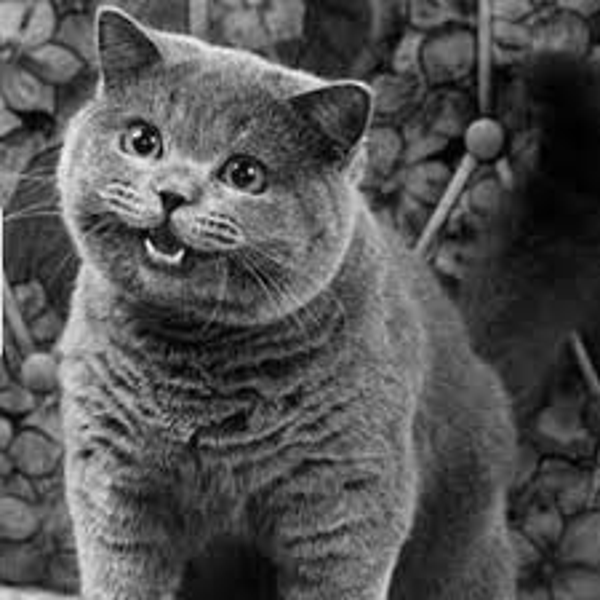

In [16]:
#Converts the numpy array to an image using Pillows fromarray method in the Image module
catImageGrayscalePil = Image.fromarray(catImageGrayscale)
#Resizes the cat image
catImageGrayscalePil = catImageGrayscalePil.resize((600, 600))
#Displays the image using Ipython.display diplay method
display(catImageGrayscalePil)

## **CONVERTS AND DISPLAYS THE COLRED IMAGE IN BINARY**

This section converts the colored image in RGB to Binary image. Outputs the shape and size of the image.

It finally resizes the binary image and displays it

In [36]:
#To convert an image to binary, first convert it to grayscale and then apply threshholding to it
# apply thresholding to convert grayscale to binary image
#ret,catImageBinary = cv2.threshold(catImageGrayscale,127,255,0)
ret, catImageBinary = cv2.threshold(catImageGrayscale,127, 255, cv2.THRESH_BINARY)

In [37]:
#Outputs the shape of the image
print(f'The shape of the binary image is {catImageBinary.shape}')

The shape of the binary image is (224, 225)


In [38]:
#Outputs the size of the cat binary image
print(f'The size of the cat image in binary is {catImageBinary.size}')

The size of the cat image in binary is 50400


In [39]:
#Outputs the pixel value at the already specified row and column
print(f'The pixel value at row {row} and column {column} is {catImageBinary[row, column]}')

The pixel value at row 50 and column 50 is 255


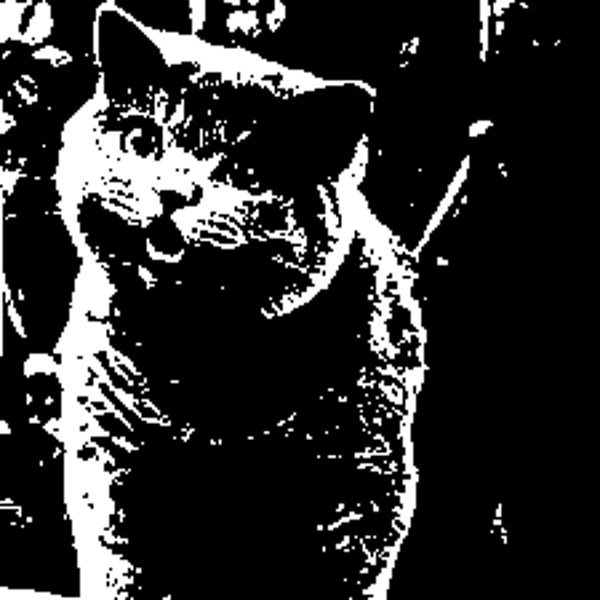

In [40]:

#Uses fromarray method in the Image module in Pillow to transform the numpy array to an image
catImageBinaryPil = Image.fromarray(catImageBinary)
#Resizes the cat image
catImageBinaryPil = catImageBinaryPil.resize((600, 600))
#Displays the image using display method from Ipython.display
display(catImageBinaryPil)

# **CONGRATULATIONS**

**You've reached the end of the notebook**

